<a href="https://colab.research.google.com/github/Manos-Mak120/-/blob/Vectorization/VECTOR_BIDEN_NEWSBOMB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import seaborn as sns

In [ ]:
 !python -m spacy download el_core_news_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/el_core_news_sm-3.8.0/el_core_news_sm-3.8.0-py3-none-any.whl (12.6 MB)
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
biden_articles_df = pd.read_csv("/content/drive/MyDrive/Εργασία Python/Articles/biden_articles_20_21.csv")
biden_articles_df.head(200) # This is a syntax error - head() takes an int argument not slice

,article_url,title,date,time,section,author,excerpt,text_body,feat_img_link,feat_img_cation
0,https://www.newsbomb.gr/kosmos/story/1191654/t...,Τζο Μπάιντεν: Αναποφάσιστος ως προς τον υποχρε...,2021-04-30,15:52:22+03:00,ΚΟΣΜΟΣ,Newsbomb,Ο πρόεδρος Μπάιντεν δεν έχει αποφασίσει σχετικ...,Ο πρόεδρος Τζο Μπάιντεν δήλωσε ότι δεν έχει ακ...,https://img.bbmd.gr/img/1260/max/82/2021/04/30...,NaN
1,https://www.newsbomb.gr/kosmos/story/1191396/h...,ΗΠΑ: Οι Αμερικανοί στηρίζουν τα οικονομικά μέτ...,2021-04-29,23:50:49+03:00,ΚΟΣΜΟΣ,Newsbomb,Η πλειονότητα των Αμερικανών στηρίζει τα οικον...,Η δημοσκόπηση αυτή δείχνει επίσης ότι οι Ρεπου...,https://img.bbmd.gr/img/1260/max/82/2021/04/29...,NaN
2,https://www.newsbomb.gr/kosmos/story/1191143/h...,ΗΠΑ: Η Αμερική «πάει μπροστά» λέει ο Μπάιντεν ...,2021-04-29,08:51:26+03:00,ΚΟΣΜΟΣ,Newsbomb,"Σαρωτικές προτάσεις για θέσεις εργασίας, εκπαί...",Παραμονές της συμπλήρωσης100 ημερώναπο την εκλ...,https://img.bbmd.gr/img/1260/max/82/2021/04/29...,"H πρώτη κυρία των ΗΠΑ, Τζιλ ΜπάιντενA.P"
3,https://www.newsbomb.gr/kosmos/story/1191106/h...,ΗΠΑ: Γράφτηκε ιστορία στο Κογκρέσο - Πίσω από ...,2021-04-29,06:44:41+03:00,ΚΟΣΜΟΣ,Γιάννης Φιλιππάκος,Κάτι που δεν έχει ξανασυμβεί διαδραματίστηκε τ...,"Στα 81 της, η επικεφαλής των Δημοκρατικών στο ...",https://img.bbmd.gr/img/1260/max/82/2021/04/29...,AP Photo
4,https://www.newsbomb.gr/kosmos/story/1190753/o...,Ο Κιλιντσάρογλου «σφυροκοπά» τον Ερντογάν – «Α...,2021-04-28,10:19:49+03:00,ΚΟΣΜΟΣ,Newsbomb,Επίθεση στον Ρετζέπ Ταγίπ Ερντογάν εξαπέλυσε η...,Ο ηγέτης της κεμαλικής αντιπολίτευσης (CHP)Κεμ...,https://img.bbmd.gr/img/1260/max/82/2021/04/28...,ASSOCIATED PRESS
...,...,...,...,...,...,...,...,...,...,...
195,https://www.newsbomb.gr/kosmos/story/1160900/h...,ΗΠΑ: Ο Μπάιντεν δεν βλέπει καταδίκη του Τραμπ ...,2021-01-26,03:39:14+02:00,ΚΟΣΜΟΣ,Γιάννης Φιλιππάκος,Ο Δημοκρατικός νέος πρόεδρος των ΗΠΑ Τζο Μπάιν...,Ο Μπάιντεν είπε στο τηλεοπτικό δίκτυο CNNi πως...,https://img.bbmd.gr/img/1260/max/82/2021/01/26...,AP Photo
196,https://www.newsbomb.gr/kosmos/story/1160889/m...,Μπάιντεν: Η Ουάσινγκτον ανησυχεί για την μεταχ...,2021-01-26,00:42:28+02:00,ΚΟΣΜΟΣ,Γιάννης Φιλιππάκος,Ο νέος πρόεδρος των ΗΠΑ Τζο Μπάιντεν δήλωσε τη...,Παράλληλα ότι επιδιώκει την παράταση της συνθή...,https://img.bbmd.gr/img/1260/max/82/2021/01/25...,AP Photo
197,https://www.newsbomb.gr/kosmos/story/1160584/h...,ΗΠΑ: Ο Μπάιντεν θα επιβάλλει νέες ταξιδιωτικές...,2021-01-25,07:53:43+02:00,ΚΟΣΜΟΣ,Γιάννης Φιλιππάκος,Κορονοϊός - Όλες οι ειδήσεις: Ο Δημοκρατικός π...,Ο Τζο Μπάιντεν θα επεκτείνει μάλιστα την απαγό...,https://img.bbmd.gr/img/1260/max/82/2021/01/25...,AP Photo
198,https://www.newsbomb.gr/kosmos/story/1160345/v...,Βενεζουέλα: Ο Μαδούρο καλεί Μπάιντεν να «γυρίσ...,2021-01-24,07:15:14+02:00,ΚΟΣΜΟΣ,Newsbomb,"Ο πρόεδρος της Βενεζουέλας, ο σοσιαλιστής Νικο...",«Είμαστε έτοιμοι να ακολουθήσουμε νέο δρόμο στ...,https://img.bbmd.gr/img/1260/max/82/2021/01/24...,NaN


In [ ]:
biden_articles_df.head(1)

,article_url,title,date,time,section,author,excerpt,text_body,feat_img_link,feat_img_cation
0,https://www.newsbomb.gr/kosmos/story/1191654/t...,Τζο Μπάιντεν: Αναποφάσιστος ως προς τον υποχρε...,2021-04-30,15:52:22+03:00,ΚΟΣΜΟΣ,Newsbomb,Ο πρόεδρος Μπάιντεν δεν έχει αποφασίσει σχετικ...,Ο πρόεδρος Τζο Μπάιντεν δήλωσε ότι δεν έχει ακ...,https://img.bbmd.gr/img/1260/max/82/2021/04/30...,NaN


In [ ]:
biden_articles_df.loc[0, 'date']

'2021-04-30'

In [ ]:
biden_articles_df.dtypes

,0
article_url,object
title,object
date,object
time,object
section,object
author,object
excerpt,object
text_body,object
feat_img_link,object
feat_img_cation,object


In [ ]:
# Select the 'date' and 'time' columns and concatenate their string representations
# with a space in between to form a single string column suitable for pd.to_datetime

# Ensure the 'time' column is treated as strings
biden_articles_df['time'] = biden_articles_df['time'].astype(str)

# Extract only the hour and minute from the time string using string slicing
# Assumes the format is consistently 'HH:MM:SS' or similar at the start
biden_articles_df['time_formatted'] = biden_articles_df['time'].str[:5]

datetime_str = biden_articles_df['date'].astype(str) + ' ' + biden_articles_df['time_formatted']

# Convert the combined string column to datetime objects
# Use the format that matches the concatenated string
biden_articles_df['datetime'] = pd.to_datetime(datetime_str, format='%Y-%m-%d %H:%M')

# Display the first few rows to verify the new 'datetime' column
biden_articles_df.head()

,article_url,title,date,time,section,author,excerpt,text_body,feat_img_link,feat_img_cation,time_formatted,datetime
0,https://www.newsbomb.gr/kosmos/story/1191654/t...,Τζο Μπάιντεν: Αναποφάσιστος ως προς τον υποχρε...,2021-04-30,15:52:22+03:00,ΚΟΣΜΟΣ,Newsbomb,Ο πρόεδρος Μπάιντεν δεν έχει αποφασίσει σχετικ...,Ο πρόεδρος Τζο Μπάιντεν δήλωσε ότι δεν έχει ακ...,https://img.bbmd.gr/img/1260/max/82/2021/04/30...,NaN,15:52,2021-04-30 15:52:00
1,https://www.newsbomb.gr/kosmos/story/1191396/h...,ΗΠΑ: Οι Αμερικανοί στηρίζουν τα οικονομικά μέτ...,2021-04-29,23:50:49+03:00,ΚΟΣΜΟΣ,Newsbomb,Η πλειονότητα των Αμερικανών στηρίζει τα οικον...,Η δημοσκόπηση αυτή δείχνει επίσης ότι οι Ρεπου...,https://img.bbmd.gr/img/1260/max/82/2021/04/29...,NaN,23:50,2021-04-29 23:50:00
2,https://www.newsbomb.gr/kosmos/story/1191143/h...,ΗΠΑ: Η Αμερική «πάει μπροστά» λέει ο Μπάιντεν ...,2021-04-29,08:51:26+03:00,ΚΟΣΜΟΣ,Newsbomb,"Σαρωτικές προτάσεις για θέσεις εργασίας, εκπαί...",Παραμονές της συμπλήρωσης100 ημερώναπο την εκλ...,https://img.bbmd.gr/img/1260/max/82/2021/04/29...,"H πρώτη κυρία των ΗΠΑ, Τζιλ ΜπάιντενA.P",08:51,2021-04-29 08:51:00
3,https://www.newsbomb.gr/kosmos/story/1191106/h...,ΗΠΑ: Γράφτηκε ιστορία στο Κογκρέσο - Πίσω από ...,2021-04-29,06:44:41+03:00,ΚΟΣΜΟΣ,Γιάννης Φιλιππάκος,Κάτι που δεν έχει ξανασυμβεί διαδραματίστηκε τ...,"Στα 81 της, η επικεφαλής των Δημοκρατικών στο ...",https://img.bbmd.gr/img/1260/max/82/2021/04/29...,AP Photo,06:44,2021-04-29 06:44:00
4,https://www.newsbomb.gr/kosmos/story/1190753/o...,Ο Κιλιντσάρογλου «σφυροκοπά» τον Ερντογάν – «Α...,2021-04-28,10:19:49+03:00,ΚΟΣΜΟΣ,Newsbomb,Επίθεση στον Ρετζέπ Ταγίπ Ερντογάν εξαπέλυσε η...,Ο ηγέτης της κεμαλικής αντιπολίτευσης (CHP)Κεμ...,https://img.bbmd.gr/img/1260/max/82/2021/04/28...,ASSOCIATED PRESS,10:19,2021-04-28 10:19:00


In [ ]:
short_biden_df = biden_articles_df[['datetime','excerpt']]
short_biden_df = short_biden_df.reset_index(drop=True)
# Now that short_biden_df is defined, we can localize the timezone
short_biden_df['datetime'] = short_biden_df['datetime'].dt.tz_localize(None)
short_biden_df.head(1)

,datetime,excerpt
0,2021-04-30 15:52:00,Ο πρόεδρος Μπάιντεν δεν έχει αποφασίσει σχετικ...


In [ ]:
short_biden_df['datetime'] = short_biden_df['datetime'].dt.tz_localize(None)

In [ ]:
short_biden_df = biden_articles_df[['datetime','excerpt']]
short_biden_df = short_biden_df.reset_index(drop=True)
short_biden_df.head(1)

,datetime,excerpt
0,2021-04-30 15:52:00,Ο πρόεδρος Μπάιντεν δεν έχει αποφασίσει σχετικ...


In [ ]:
short_biden_df['year'] = pd.DatetimeIndex(short_biden_df['datetime']).year
short_biden_df['month'] = pd.DatetimeIndex(short_biden_df['datetime']).month
short_biden_df['day'] = pd.DatetimeIndex(short_biden_df['datetime']).day
short_biden_df['hour'] = pd.DatetimeIndex(short_biden_df['datetime']).hour

In [ ]:
short_biden_df.head()

,datetime,excerpt,year,month,day,hour
0,2021-04-30 15:52:00,Ο πρόεδρος Μπάιντεν δεν έχει αποφασίσει σχετικ...,2021,4,30,15
1,2021-04-29 23:50:00,Η πλειονότητα των Αμερικανών στηρίζει τα οικον...,2021,4,29,23
2,2021-04-29 08:51:00,"Σαρωτικές προτάσεις για θέσεις εργασίας, εκπαί...",2021,4,29,8
3,2021-04-29 06:44:00,Κάτι που δεν έχει ξανασυμβεί διαδραματίστηκε τ...,2021,4,29,6
4,2021-04-28 10:19:00,Επίθεση στον Ρετζέπ Ταγίπ Ερντογάν εξαπέλυσε η...,2021,4,28,10


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer() #πάντα αυτό

In [ ]:
short_biden_df.head(5)

,datetime,excerpt,year,month,day,hour
0,2021-04-30 15:52:00,Ο πρόεδρος Μπάιντεν δεν έχει αποφασίσει σχετικ...,2021,4,30,15
1,2021-04-29 23:50:00,Η πλειονότητα των Αμερικανών στηρίζει τα οικον...,2021,4,29,23
2,2021-04-29 08:51:00,"Σαρωτικές προτάσεις για θέσεις εργασίας, εκπαί...",2021,4,29,8
3,2021-04-29 06:44:00,Κάτι που δεν έχει ξανασυμβεί διαδραματίστηκε τ...,2021,4,29,6
4,2021-04-28 10:19:00,Επίθεση στον Ρετζέπ Ταγίπ Ερντογάν εξαπέλυσε η...,2021,4,28,10


In [ ]:
short_biden_df.shape

(369, 6)

In [ ]:
short_biden_df['excerpt'] = short_biden_df['excerpt'].fillna('')

In [ ]:
count_vector = cv.fit_transform(short_biden_df['excerpt']) #παίρνουμε τα κείμενα

In [ ]:
count_vector #μοναδικές λέξεις 11520 + 120

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 10263 stored elements and shape (369, 3143)>

In [ ]:
count_vector.shape

(369, 3143)

In [ ]:
BoW = cv.get_feature_names_out()
list(BoW)[1400:1410]

['εφησυχασμού',
 'εφοδιασμό',
 'εφόσον',
 'εχθρότητά',
 'εύθραυστη',
 'εύρος',
 'εύτακτη',
 'εύχεται',
 'ζήτημα',
 'ζήτησαν']

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,01,03,04,10,100,10ετούς,11,11ης,...,ότι,όχι,ύμνο,ύπατος,ύστατη,ύψη,ύψους,ώρα,ώρες,ώστε
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

In [ ]:
count_vector = cv.fit_transform(short_biden_df['excerpt'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,01,03,04,10,100,10ετούς,11,11ης,...,όρος,όρου,όροφο,ύμνο,ύπατος,ύστατη,ύψη,ύψους,ώρα,ώρες
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), max_df=0.95, min_df=0.01) #πάρε ο,τι είναι πάνω του 95% των κειμένων

In [ ]:
count_vector = cv.fit_transform(short_biden_df['excerpt'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,000,100,11,12,17,1821,19,20,200,2020,...,χθες,χρόνια,χτύπημα,χώρα,χώρας,χώρες,ψάκι,ύψους,ώρα,ώρες
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20) # δειξε μου τα 20 πιο συχνά
count_vector = cv.fit_transform(short_biden_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,αμερικανός,αρμενίων,δήλωσε,ειδήσεις,εκλεγμένος,εκλογές,ερντογάν,ηπα,μπάιντεν,ντόναλντ,ορκωμοσία,ουάσινγκτον,πούτιν,προέδρου,πρόεδρο,πρόεδρος,σήμερα,τζο,τουρκία,τραμπ
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
4,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20) # δειξε μου τα 20 πιο συχνά
count_vector = cv.fit_transform(short_biden_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,αμερικανός,αρμενίων,δήλωσε,ειδήσεις,εκλεγμένος,εκλογές,ερντογάν,ηπα,μπάιντεν,ντόναλντ,ορκωμοσία,ουάσινγκτον,πούτιν,προέδρου,πρόεδρο,πρόεδρος,σήμερα,τζο,τουρκία,τραμπ
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
4,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_biden_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,3ης νοεμβρίου,αμερικανός πρόεδρος,γενοκτονίας αρμενίων,εκλεγμένος πρόεδρος,εκλεγμένου προέδρου,εκλογές ηπα,ηπα τζο,κορονοϊός ειδήσεις,λευκού οίκου,λευκό οίκο,νέος πρόεδρος,ντόναλντ τραμπ,προέδρου ηπα,προέδρου τζο,πρόεδρο ηπα,πρόεδρος ηπα,πρόεδρος τζο,ρετζέπ ταγίπ,ταγίπ ερντογάν,τζο μπάιντεν
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


In [ ]:
results.sum(axis =0).sort_values(ascending = False) #Προσθήκη axis στο συνολο των αποτελσμάτων . Στα rows. Μελετάει τις εμφανίσεις αυτού τοτ term.

,0
τζο μπάιντεν,236
ηπα τζο,70
πρόεδρος ηπα,64
ντόναλντ τραμπ,53
πρόεδρος τζο,36
αμερικανός πρόεδρος,28
προέδρου τζο,22
πρόεδρο ηπα,21
εκλεγμένος πρόεδρος,20
προέδρου ηπα,17


In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

,0
τζο μπάιντεν,236
ηπα τζο,70
πρόεδρος ηπα,64
ντόναλντ τραμπ,53
πρόεδρος τζο,36


In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,  #Με αυτό το τρόπο φτιάχνουμε ένα λεξικό παίρνωντας τις λέξεις
                     vocabulary = ['εκλογές', 'πρόεδρος', 'ορκομωσία'])
count_vector = cv.fit_transform(short_biden_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,εκλογές,πρόεδρος,ορκομωσία
0,0,1,0
1,0,1,0
2,0,2,0
3,0,1,0
4,0,0,0


In [ ]:
results.sort_values(by=['εκλογές'], ascending=False).head()

,εκλογές,πρόεδρος,ορκομωσία
367,2,0,0
351,2,1,0
340,2,0,0
357,2,0,0
330,2,0,0


In [ ]:
short_biden_df['excerpt'].loc[10]

'Το Κρεμλίνο ανακοίνωσε ότι η συνάντηση των προέδρων της Ρωσίας και των ΗΠΑ Βλαντιμίρ Πούτιν και Τζο\xa0Μπάιντεν\xa0σχεδιάζεται να πραγματοποιηθεί κατά την καλοκαιρινή περίοδο, αλλά μέχρι στιγμής δεν έχει συμφωνηθεί η ημερομηνία της συνάντησης ούτε η χώρα στην οποία θα πραγματοποιηθεί.'

In [ ]:
biden_articles_df['title'].loc[10]

'Κρεμλίνο: Το καλοκαίρι η συνάντηση Πούτιν-Μπάιντεν'

In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=10, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_biden_df.iloc[[10]]['excerpt'])
results114 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
sum_words114 =  results114.sum(axis =0)
sum_words114.sort_values(ascending = False).head()

,0
ανακοίνωσε συνάντηση,1
βλαντιμίρ πούτιν,1
ημερομηνία συνάντησης,1
ηπα βλαντιμίρ,1
καλοκαιρινή περίοδο,1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_biden_df['excerpt'])  #finds the tfidf score with normalization

In [ ]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

,000,01,100,11,12,14,15,17,18,1821,...,χώρες,χώρο,ψάκι,ψήφους,ψήφων,όπλα,όπλων,ύψους,ώρα,ώρες
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.202565,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity #ΚΑΤΑ ΠΟΣΟ ΤΑ ΑΡΘΡΑ ΜΟΥ ΔΙΑΦΕΡΟΥΝ ΑΠΟ ΤΟΥΣ ΥΠΟΛΟΙΠΟΥΣ. ΠΟΣΟ ΟΙ ΑΛΛΟΙ ΕΧΟΥΝ ΕΠΗΡΕΑΣΤΕΙ ΑΠΟ ΜΕΝΑ

print("cosine scores ==> ")
print(cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with all elements (including itself)

cosine scores ==> 
[[1.         0.06222097 0.05369664 0.02151448 0.01688486 0.01311787
  0.06748947 0.01072815 0.         0.02949055 0.01246686 0.0135143
  0.04334157 0.03447463 0.0142492  0.01988984 0.01384931 0.01882736
  0.01919451 0.         0.03426715 0.01293334 0.01076852 0.0150493
  0.01621651 0.0136138  0.03910297 0.07069934 0.01537579 0.01379891
  0.         0.0403564  0.01249244 0.01145511 0.03835033 0.01648477
  0.         0.         0.02313702 0.01405745 0.03148225 0.
  0.         0.         0.         0.         0.         0.04156912
  0.0411241  0.03222351 0.06332295 0.17961724 0.         0.
  0.03797418 0.38537008 0.         0.01256934 0.04489301 0.
  0.         0.05214808 0.07439324 0.26751731 0.         0.0179255
  0.0320739  0.02466553 0.         0.         0.         0.01530885
  0.17820867 0.         0.         0.06622937 0.0109099  0.04099116
  0.02176155 0.         0.01601087 0.03675711 0.03711328 0.0251305
  0.04142266 0.0631557  0.         0.01917555 0.01622064 

In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train) # συγκρίνουμε όλα τα άρθρα μεταξύ τους

In [ ]:
len(arr)

369

<Axes: >

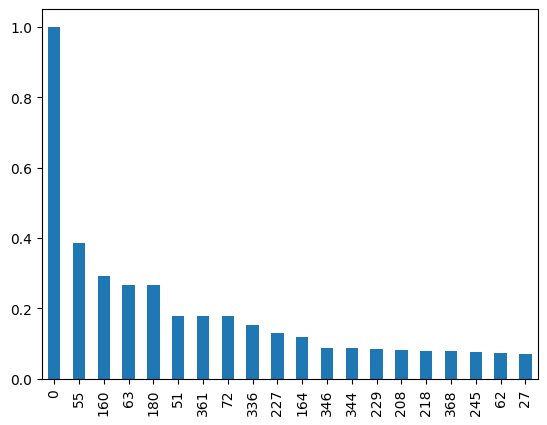

In [ ]:
pd.DataFrame(arr).loc[0].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [ ]:
short_biden_df['excerpt'].loc[0]

'Ο πρόεδρος Μπάιντεν δεν έχει αποφασίσει σχετικά με τον υποχρεωτικό εμβολιασμό, όλου του προσωπικού των αμερικανικών ενόπλων δυνάμεων.'

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_biden_df['excerpt'])  #finds the tfidf score with normalization

In [ ]:
short_biden_df['excerpt'].loc[4]

'Επίθεση στον Ρετζέπ Ταγίπ Ερντογάν εξαπέλυσε η αντιπολίτευση στον απόηχο της αναγνώρισης της Γενοκτονίας των Αρμενίων από τον Τζο Μπάιντεν.'

<Axes: >

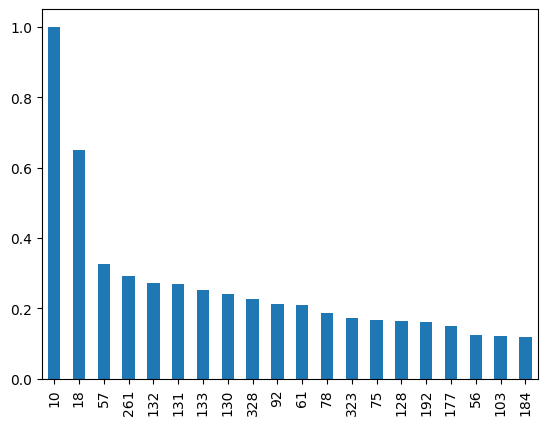

In [ ]:
pd.DataFrame(arr).loc[10].sort_values(ascending = False).head(20).plot(kind = 'bar')

<Axes: >

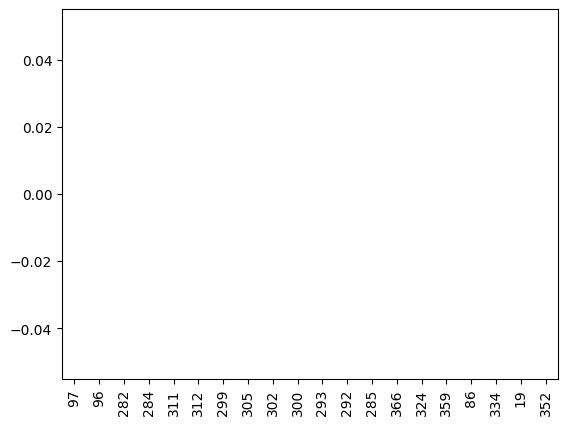

In [ ]:
pd.DataFrame(arr).loc[0].sort_values(ascending = False).tail(20).plot(kind = 'bar')

In [ ]:
short_biden_df['excerpt'].loc[10]

'Το Κρεμλίνο ανακοίνωσε ότι η συνάντηση των προέδρων της Ρωσίας και των ΗΠΑ Βλαντιμίρ Πούτιν και Τζο\xa0Μπάιντεν\xa0σχεδιάζεται να πραγματοποιηθεί κατά την καλοκαιρινή περίοδο, αλλά μέχρι στιγμής δεν έχει συμφωνηθεί η ημερομηνία της συνάντησης ούτε η χώρα στην οποία θα πραγματοποιηθεί.'

In [ ]:
short_biden_df['excerpt'].loc[15]

'Ο Τζο Μπάιντεν αναγνώρισε τη Γενοκτονία των Αρμενίων και η Κιμ Καρντάσιαν με ένα μακροσκελές μήνυμα στο Instagram ευχαρίστησε τον πρόεδρο των ΗΠΑ για αυτή του την ενέργεια.'

In [ ]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10]) # συγκρίνουμε τα 10 πρώτα άρθρα μεταξύ τους

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων (Μπάιντεν:Newsbomb)'}>

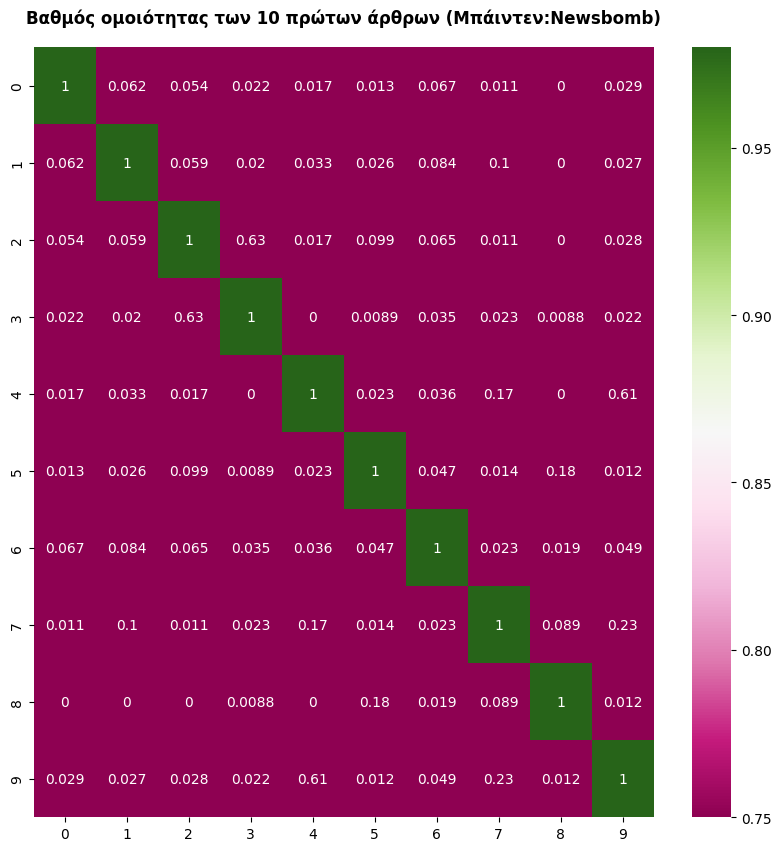

In [ ]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων (Μπάιντεν:Newsbomb)', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα

sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")

#plt.savefig('<το path και το όνομα του αρχείου>.png')

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

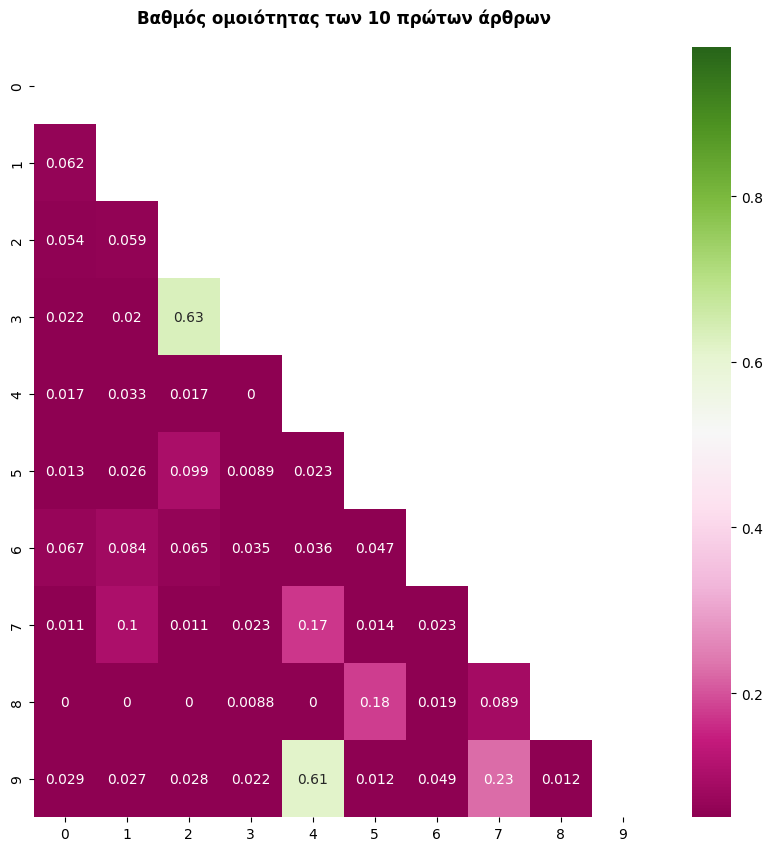

In [ ]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα

# mask
mask = np.triu(np.ones_like(arr, dtype=bool))
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="PiYG", mask=mask)

#plt.savefig('<το path και το όνομα του αρχείου>.png')